<a href="https://colab.research.google.com/github/BrunoPereira1/Topicos-Integradores2/blob/master/Projeto_An%C3%A1lise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Alunos: Bruno Pereira, Caio Romulo e Fernando Bivar**

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("relatorio-de-multas-implantadas-em-2014.csv", sep=";")

In [0]:
df.head()

## **ANÁLISE 1**

**As 10 infrações que mais ocorreram no ano de 2014.**

`Tabela`

In [0]:
data = pd.DataFrame(df.infracao.value_counts()[0:10])

In [156]:
data

,infracao
7455,150077
5550,56600
5541,33894
7463,32716
5452,29154
7366,21263
6050,19841
6041,10712
5185,5753
5819,3915


`Gráfico em Barra`

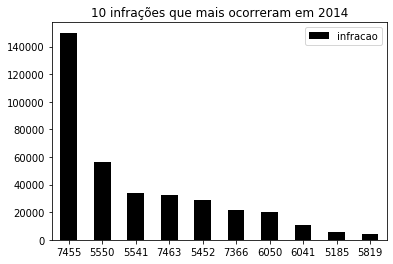

In [157]:
data.plot.bar(title="10 infrações que mais ocorreram em 2014",color='black',rot=0)

## **ANÁLISE 2**

**Os meses que mais tiveram infrações no ano de 2014.**

`Tabela`

In [0]:
df.datainfracao = pd.to_datetime(df.datainfracao)

In [159]:
df.datainfracao.dt.month_name().value_counts()

September    49658
October      46445
August       40200
January      36477
November     36326
February     34521
July         33851
March        32471
April        31759
May          28006
June         24654
December     23837
Name: datainfracao, dtype: int64

`Gráfico em Barra`

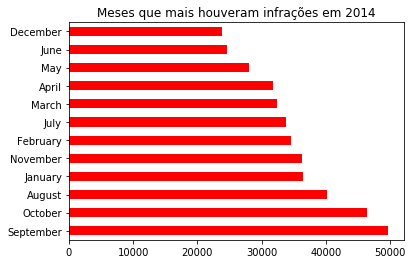

In [160]:
df.datainfracao.dt.month_name().value_counts().plot.barh(title="Meses que mais houveram infrações em 2014",color='red')

## **ANÁLISE 3**

**Os 3 locais que mais ocorreram infrações no ano de 2014.**



`Tabela`

In [161]:
df.localcometimento.value_counts()[0:3]

AV. ENG. JOSE ESTELITA - ENTRE OS PTES. DE ILUM. 19-R E 21-R-S. CENTRO         21010
R. ARQUITETO LUIZ  NUNES, B. IMBIRIBEIRA ENTRE  N. 314 E 375 , SENT. IPSEP-    17848
AV. ENG. ANTONIO DE GOES, N. 200-SENTIDO  CENTRO                               14361
Name: localcometimento, dtype: int64

`Gráfico em Pizza`

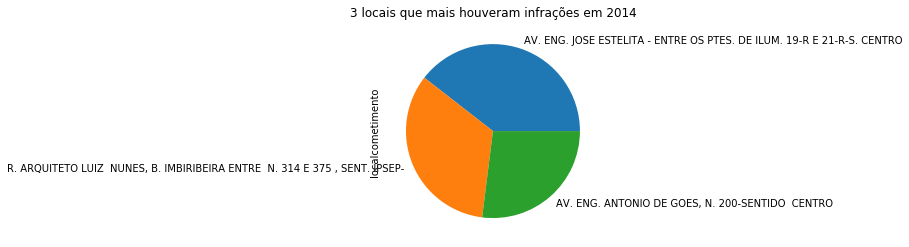

In [162]:
df.localcometimento.value_counts()[0:3].plot.pie(title="3 locais que mais houveram infrações em 2014")

## **ANÁLISE 4**

**Os 5 horários que mais ocorreram infrações.**

`Tabela`

In [163]:
df.horainfracao.value_counts()[0:5]

15:30:00    315
15:20:00    301
15:00:00    298
10:00:00    261
15:40:00    253
Name: horainfracao, dtype: int64

`Gráfico em Barra`

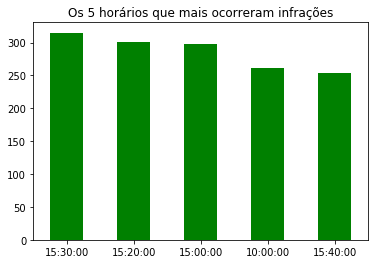

In [164]:
df.horainfracao.value_counts()[0:5].plot.bar(title="Os 5 horários que mais ocorreram infrações",color='green',rot=0)

## **ANÁLISE 5**

**Infrações cometidas por estacionar em desacordo com as condições do local (Zona Azul)**

`Tabela`

In [0]:
data = pd.concat([df.agenteequipamento.value_counts().filter(like="7"),df.agenteequipamento.value_counts().filter(like="2")])

In [166]:
data

Código 7 - ZONA AZUL TALÃO ELETRÔNICO    28147
Código 2 - ZONA AZUL TALÃO MANUAL         3146
Name: agenteequipamento, dtype: int64

`Gráfico em Barra horizontal`

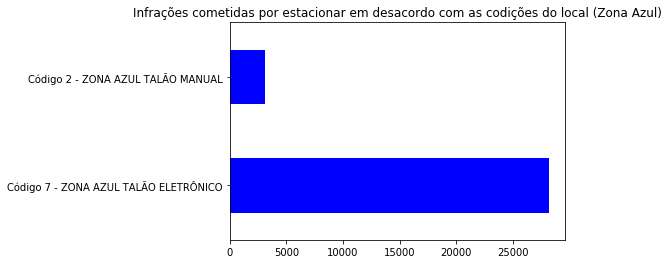

In [167]:
data.plot.barh(title="Infrações cometidas por estacionar em desacordo com as codições do local (Zona Azul)",color='blue')

## **ANÁLISE 6**

**Número de infrações cometidas com excesso de velocidade**

`Tabela`

In [0]:
data = df.descricaoinfracao.value_counts().filter(like='Transitar em velocidade superior à máxima')

In [169]:
data

Transitar em velocidade superior à máxima permitida para o local em até 20% (vinte por cento).                                      150077
Transitar em velocidade superior à máxima permitida para o local em mais de 20% (vinte por cento) até 50% (cinqüenta por cento).     32716
Transitar em velocidade superior à máxima permitida em mais de 50%.                                                                   3552
Name: descricaoinfracao, dtype: int64

`Gráfico em Pizza`

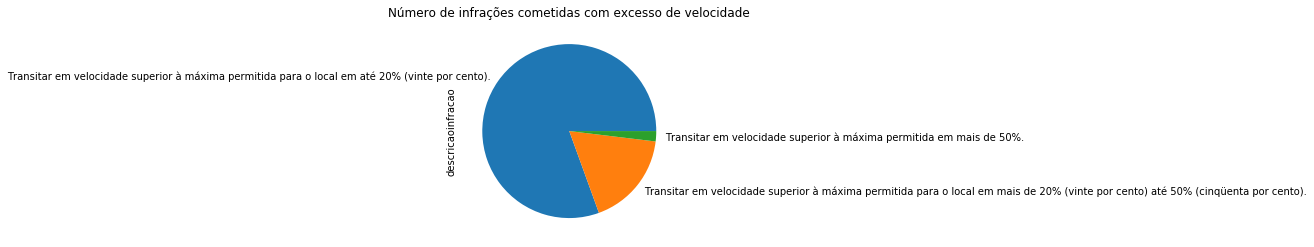

In [170]:
data.plot.pie(title="Número de infrações cometidas com excesso de velocidade")

## **ANÁLISE 7**

**Número de infrações cometidas ao dirigir usando Telefone Celular**

`Tabela`

In [0]:
data = df.descricaoinfracao.value_counts().filter(like='celular')

In [172]:
data

Dirigir o veículo utilizando-se de telefone celular.    20506
Name: descricaoinfracao, dtype: int64

`Gráfico em Barra horizontal`

In [0]:
x = [len(df)]

In [0]:
y = pd.DataFrame(data = x)

In [0]:
z = y.rename(index={0:'Total 2014'})

In [0]:
compare = pd.concat([data,z])

In [177]:
compare

,0
Dirigir o veículo utilizando-se de telefone celular.,20506
Total 2014,418205


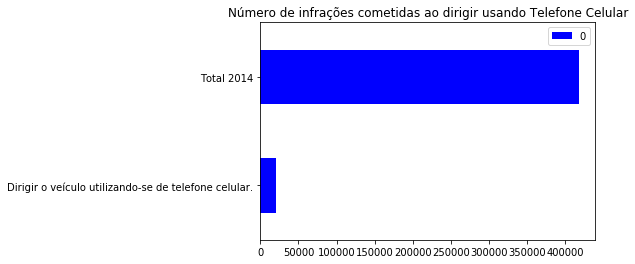

In [178]:
compare.plot.barh(title="Número de infrações cometidas ao dirigir usando Telefone Celular",color='blue')

## **ANÁLISE 8**

**Os 5 locais que mais ocorreram infrações no dia 01 de Janeiro de 2014**

`Tabela`

In [0]:
dti = df.loc[df['datainfracao'].isin(['2014-01-01'])]

In [180]:
dti.localcometimento.value_counts()[0:5]

Av. Rui Barbosa, n. 1397-Sentido Av. Gov. Agamenon Magalhães             67
AV. CONSELHEIRO AGUIAR, PROXIMO AO N 1350, CONJ. RESID. PERNAMBUCANO-    44
AV. ENG. ANTONIO DE GOES, N. 200-SENTIDO  CENTRO                         41
AV. RECIFE - N 1644 - SEMF. 617 ; SENTIDO: CEASA                         20
AV BOA VIAGEM, LADO OPOSTO  AO N. 4040                                   19
Name: localcometimento, dtype: int64

`Gráfico em Pizza`

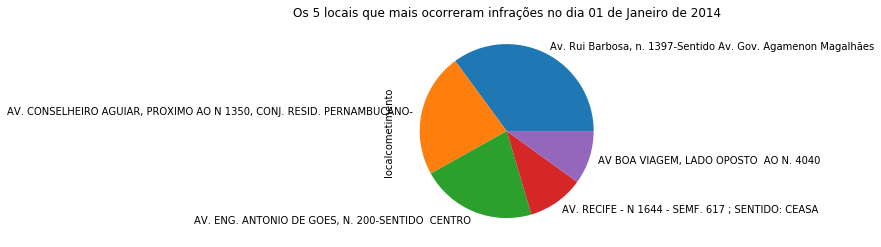

In [181]:
dti.localcometimento.value_counts()[0:5].plot.pie(title="Os 5 locais que mais ocorreram infrações no dia 01 de Janeiro de 2014")

## *INCLUINDO OUTRA DATABASE PARA COMPARAÇÕES TEMPORAIS*

In [0]:
df1 = pd.read_csv("relatorio-de-multas-implantadas-em-2015.csv", sep=";")

In [236]:
df1.head()

,datainfracao,horainfracao,dataimplantacao,agenteequipamento,infracao,descricaoinfracao,amparolegal,localcometimento
0,2015-10-26,08:42:00,2015/11/03 00:00:00.000,Código 6 - AUTOS NO TALÃO MANUAL,5541,Estacionar o veículo em desacordo com as condi...,"Art. 181, Inc. XVII",AV PORTUGAL EM FRENTE AO IMOVEL N 89
1,2015-10-26,08:45:00,2015/11/03 00:00:00.000,Código 6 - AUTOS NO TALÃO MANUAL,5541,Estacionar o veículo em desacordo com as condi...,"Art. 181, Inc. XVII",AV PORTUGAL EM FRENTE AO IMOVEL N 89
2,2015-10-26,08:48:00,2015/11/03 00:00:00.000,Código 6 - AUTOS NO TALÃO MANUAL,5525,Estacionar o veículo na contramão de direção.,"Art. 181, Inc. XV",AV PORTUGAL EM FRENTE AO IMOVEL N 101
3,2015-10-26,08:55:00,2015/11/03 00:00:00.000,Código 6 - AUTOS NO TALÃO MANUAL,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII",RUA PACIFICO DOS SANTOS EM FRENTE AO IMOVEL N 124
4,2015-10-26,09:10:00,2015/11/03 00:00:00.000,Código 6 - AUTOS NO TALÃO MANUAL,7366,Dirigir o veículo utilizando-se de telefone ce...,"Art. 252, Inc. VI",AV GOV AGAMENON MAGALHAES EM FRENTE AO SEMAFOR...


In [0]:
df1.datainfracao = pd.to_datetime(df1.datainfracao)

## **ANÁLISE 9**

**Comparando se cresceu ou diminuiu o número de infrações por excesso de velocidade do mês de Janeiro 2014 para o mês de Janeiro de 2015**

*Preparando Database 2014*

In [0]:
df2014 = df.loc[df.datainfracao.dt.month_name()== 'January']

In [0]:
df2014TotSemNome = df2014.datainfracao.dt.month_name().value_counts()

In [0]:
df2014Tot = df2014TotSemNome.rename(index={'January':'January 2014'})

*Preparando Database 2015*

In [0]:
df2015 = df1.loc[df1.datainfracao.dt.month_name()== 'January']

In [0]:
df2015TotSemNome = df2015.datainfracao.dt.month_name().value_counts()

In [0]:
df2015Tot = df2015TotSemNome.rename(index={'January':'January 2015'})

`Tabela`

In [0]:
data = pd.concat([df2014Tot,df2015Tot])

In [191]:
data

January 2014    36477
January 2015    50608
Name: datainfracao, dtype: int64

Gráfico e Barra

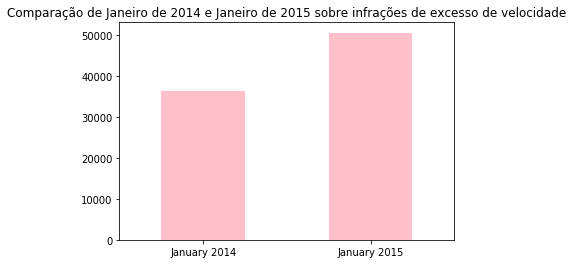

In [192]:
data.plot.bar(title="Comparação de Janeiro de 2014 e Janeiro de 2015 sobre infrações de excesso de velocidade",color='pink',rot=0)


## **ANÁLISE 10**

**Crescimento ou Diminuição da quantidade de infrações de 2014 para 2015**

*Preparando DataFrame 2014*

In [0]:
TotX = [len(df)]

In [0]:
Tot2014SemNome = pd.DataFrame(data = TotX)

In [0]:
Tot2014 = Tot2014SemNome.rename(index={0:'Total 2014'})

*Preparando DataFrame 2015*

In [0]:
TotY = [len(df1)]

In [0]:
Tot2015SemNome = pd.DataFrame(data = TotY)

In [0]:
Tot2015 = Tot2015SemNome.rename(index={0:'Total 2015'})

`Tabela`

In [0]:
data = pd.concat([Tot2014,Tot2015])

In [204]:
data

,0
Total 2014,418205
Total 2015,629158


`Gráfico em Barra horizontal`

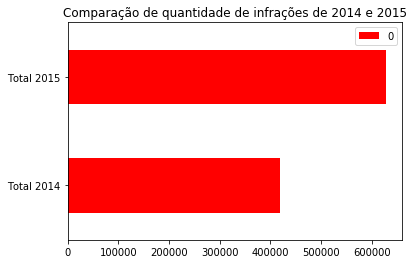

In [205]:
data.plot.barh(title="Comparação de quantidade de infrações de 2014 e 2015",color='red')

***Porcentagem de Crescimento***

In [0]:
Val = Tot2015[0][0] - Tot2014[0][0]

In [0]:
PcentTot = Val/Tot2014[0][0]*100

In [0]:
PcentAbrev = round(PcentTot,2)

In [0]:
x = [PcentAbrev]

In [0]:
data1SemNome = pd.DataFrame(data = x)

In [0]:
data1 = data1SemNome.rename(index={0:'Crescimento(%)'})

`Tabela`

In [212]:
data1

,0
Crescimento(%),50.44


`Gráfico em Linha`

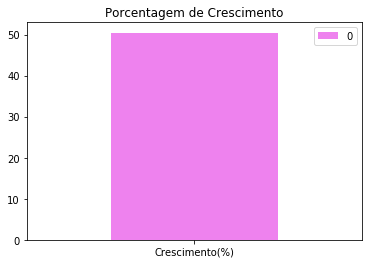

In [213]:
data1.plot.bar(title="Porcentagem de Crescimento",color='violet',rot=0)

# **ANÁLISE EXPLORATÓRIA 2**

**Evolução do número de infrações nos primeiros 6 meses**

In [0]:
df.datainfracao = pd.to_datetime(df.datainfracao)

In [0]:
meses2014 = df.datainfracao.dt.month_name().value_counts()

In [0]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [0]:
meses2014 = meses2014.reindex(new_order,axis=0)

In [226]:
meses2014[0:6]

January     36477
February    34521
March       32471
April       31759
May         28006
June        24654
Name: datainfracao, dtype: int64

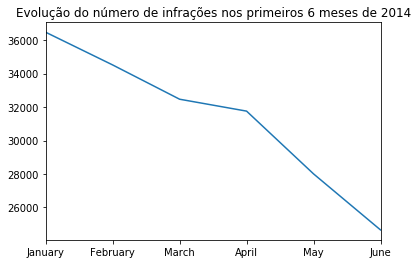

In [218]:
meses2014[0:6].plot(title="Evolução do número de infrações nos primeiros 6 meses de 2014")

**Comparação com boxplot dos meses de 2014 e 2015**

In [0]:
df1.datainfracao = pd.to_datetime(df1.datainfracao)

In [0]:
meses2015 = df1.datainfracao.dt.month_name().value_counts()

In [0]:
meses2015 = meses2015.reindex(new_order,axis=0)

In [227]:
meses2015[0:6]

January     50608
February    47774
March       47669
April       54120
May         47652
June        39476
Name: datainfracao, dtype: int64

In [0]:
data = pd.DataFrame(data=[meses2014[0:6],meses2015[0:6]],index=['2014','2015'])

In [229]:
data

,January,February,March,April,May,June
2014,36477,34521,32471,31759,28006,24654
2015,50608,47774,47669,54120,47652,39476


In [0]:
import matplotlib.pyplot as plt

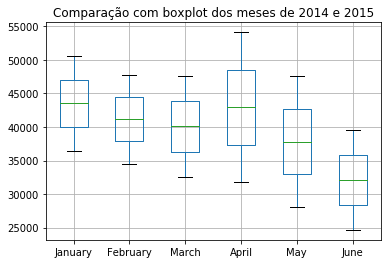

In [231]:
data.boxplot()
plt.title("Comparação com boxplot dos meses de 2014 e 2015")
plt.show()